In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_merged_mdrug_ctrial = pd.merge(df_clinical_trial, df_mouse_drug, how='left', on='Mouse ID')


# Display the data table for preview
df_merged_mdrug_ctrial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [7]:
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_timepoint_mean = pd.DataFrame({'Tumor Volume (mm3)':grouped_drug_timepoint['Tumor Volume (mm3)'].mean()}).reset_index()

df_drug_timepoint_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_response_sem = pd.DataFrame({'Tumor Volume (mm3)':grouped_drug_timepoint['Tumor Volume (mm3)'].sem() }).reset_index()

df_drug_response_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_drug_timepoint_mean_reformat = df_drug_timepoint_mean.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
df_drug_timepoint_mean_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


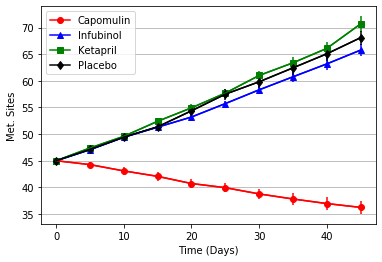

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
data = df_drug_timepoint_mean_reformat

lst_chart_specs = [{'drug':'Capomulin','color':'red','marker':'o'},
                      {'drug':'Infubinol','color':'blue','marker':'^'},
                      {'drug':'Ketapril','color':'green','marker':'s'},
                      {'drug':'Placebo','color':'black','marker':'d'}]

for chart_specs in lst_chart_specs:    
    sem_response = df_drug_response_sem.loc[df_drug_response_sem['Drug']==chart_specs['drug'], 'Tumor Volume (mm3)']    
    ax.errorbar(data.index, data[chart_specs['drug']],sem_response, color=chart_specs['color'])
    ax.plot(data.index, data[chart_specs['drug']], color=chart_specs['color'], label=chart_specs['drug'], marker=chart_specs['marker'])

ax.legend(loc='best')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Met. Sites')
ax.yaxis.grid()
fig.savefig('Images/plt_spread.png')
plt.show()


In [11]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_metsite_mean = pd.DataFrame({'Metastatic Sites':grouped_drug_timepoint['Metastatic Sites'].mean()}).reset_index()

df_drug_metsite_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_metsite_sem = pd.DataFrame({'Metastatic Sites':grouped_drug_timepoint['Metastatic Sites'].sem() }).reset_index()

df_drug_metsite_sem.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
df_drug_metsite_mean_reformat = df_drug_metsite_mean.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
df_drug_metsite_mean_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


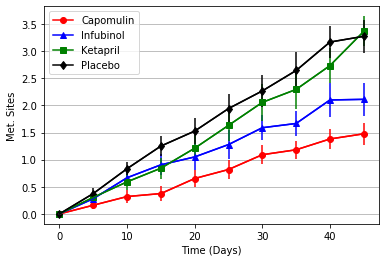

In [15]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
fig, ax = plt.subplots()
data = df_drug_metsite_mean_reformat

lst_chart_specs = [{'drug':'Capomulin','color':'red','marker':'o'},
                      {'drug':'Infubinol','color':'blue','marker':'^'},
                      {'drug':'Ketapril','color':'green','marker':'s'},
                      {'drug':'Placebo','color':'black','marker':'d'}]


for chart_specs in lst_chart_specs:    
    sem_metsites = df_drug_metsite_sem.loc[df_drug_metsite_sem['Drug']==chart_specs['drug'], 'Metastatic Sites']    
    ax.errorbar(data.index, data[chart_specs['drug']],sem_metsites, color=chart_specs['color'])
    ax.plot(data.index, data[chart_specs['drug']], color=chart_specs['color'], label=chart_specs['drug'], marker=chart_specs['marker'])
    

ax.legend(loc='best')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Met. Sites')
ax.yaxis.grid()
fig.savefig('Images/plt_spread.png')
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


grouped_drug_mousecount = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_mouse_count = pd.DataFrame({'Mouse Count':grouped_drug_timepoint['Mouse ID'].count()}).reset_index()

df_drug_mouse_count.head()




,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
df_drug_mouse_count_reformat = df_drug_mouse_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
df_drug_mouse_count_reformat


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


25

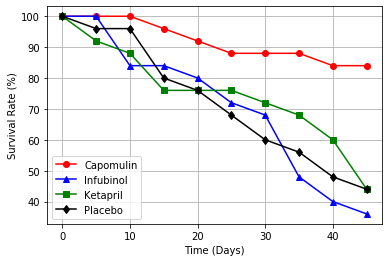

In [33]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
fig, ax = plt.subplots()
data = df_drug_mouse_count_reformat
perc = np.linspace(0,100,len(df_drug_mouse_count_reformat.index))

lst_chart_specs = [{'drug':'Capomulin','color':'red','marker':'o'},
                      {'drug':'Infubinol','color':'blue','marker':'^'},
                      {'drug':'Ketapril','color':'green','marker':'s'},
                      {'drug':'Placebo','color':'black','marker':'d'}]


for chart_specs in lst_chart_specs:    
    data[chart_specs['drug']] = (data[chart_specs['drug']]/data[chart_specs['drug']].max()) * 100
    ax.plot( data.index,   data[chart_specs['drug']], color=chart_specs['color'], label=chart_specs['drug'], marker=chart_specs['marker'])
    

ax.legend(loc='best')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.grid()
fig.savefig('Images/plt_survival.png')
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)